In [5]:
import nltk
nltk.download('punkt')#安装本案例所需要的NLTK数据

print('分割句子与单词')
#给出样本文本
mytext1 = "Hello Adam, how are you? I hope everything is going well. Today is a good day, see you dude."
mytext2 = "Hello Mr. Adam, how are you? I hope everything is going well. Today is a good day, see you dude."

#用句子tokenizer，将文本tokenize成句子
from nltk.tokenize import sent_tokenize
print('分割后的句子：')
print(sent_tokenize(mytext1))

#标点符号来拆分句子
from nltk.tokenize import PunktSentenceTokenizer
PST = PunktSentenceTokenizer()
print(PST.tokenize (mytext2))

#使用NLTK的sent_tokenize来拆分：
from nltk.tokenize import sent_tokenize
print(sent_tokenize(mytext2))

#接下来试试单词tokenizer
from nltk.tokenize import word_tokenize
print('分割后的单词：')
print(word_tokenize(mytext2))

#非英文Tokenize
from nltk.tokenize import sent_tokenize
mytext3 = "Bonjour M. Adam, comment allez-vous? J'espère que tout va bien. Aujourd'hui est un bon jour."
print('其他语言支持：')
print(sent_tokenize(mytext3,"french"))

分割句子与单词
分割后的句子：
['Hello Adam, how are you?', 'I hope everything is going well.', 'Today is a good day, see you dude.']
['Hello Mr.', 'Adam, how are you?', 'I hope everything is going well.', 'Today is a good day, see you dude.']
['Hello Mr. Adam, how are you?', 'I hope everything is going well.', 'Today is a good day, see you dude.']
分割后的单词：
['Hello', 'Mr.', 'Adam', ',', 'how', 'are', 'you', '?', 'I', 'hope', 'everything', 'is', 'going', 'well', '.', 'Today', 'is', 'a', 'good', 'day', ',', 'see', 'you', 'dude', '.']
其他语言支持：
['Bonjour M. Adam, comment allez-vous?', "J'espère que tout va bien.", "Aujourd'hui est un bon jour."]


[nltk_data] Error loading punkt: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


In [6]:
print('二、词干提取')
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print('从working、works和worked中提取出词干原型')
print(stemmer.stem('working'))
print(stemmer.stem('works'))
print(stemmer.stem('worked'))

二、词干提取
从working、works和worked中提取出词干原型
work
work
work


In [8]:
print('三、查词典、同义词和反义词处理')
nltk.download('wordnet') #安装本案例所需要的NLTK数据
#nltk.download() 
from nltk.corpus import wordnet

syn = wordnet.synsets('pain')
print('pain的定义是：')
print(syn[0].definition())
print('pain的例句：')
print(syn[0].examples())

#获取Computer的同义词
synonyms = []
for syn in wordnet.synsets('Computer'):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
print('Computer的同义词有：')
print(synonyms)

#用同样的方法得到反义词
antonyms = []
for syn in wordnet.synsets('small'):
    for l in syn.lemmas():
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())
print('small的反义词有：')
print(antonyms)

三、查词典、同义词和反义词处理


[nltk_data] Error loading wordnet: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


pain的定义是：
a symptom of some physical hurt or disorder
pain的例句：
['the patient developed severe pain and distension']
Computer的同义词有：
['computer', 'computing_machine', 'computing_device', 'data_processor', 'electronic_computer', 'information_processing_system', 'calculator', 'reckoner', 'figurer', 'estimator', 'computer']
small的反义词有：
['large', 'big', 'big']


In [10]:
import jieba
import jieba.posseg as psg
from collections import Counter

s = u'北京大学毕业生于昨日来Python公司应聘！'
cut = jieba.cut(s)       #分词
print('Output：')          #分词结果
print(','.join(cut))

Building prefix dict from the default dictionary ...


Output：


Dumping model to file cache C:\Users\houfang\AppData\Local\Temp\jieba.cache
Loading model cost 0.970 seconds.
Prefix dict has been built successfully.


北京大学,毕业生,于,昨日,来,Python,公司,应聘,！


In [11]:
words=psg.cut(s)        #按词性标注，词性含义将参看附录A  
for word,flag in words: #输出词性标注结果
    print(word,flag)

北京大学 nt
毕业生 n
于 p
昨日 t
来 v
Python eng
公司 n
应聘 v
！ x


In [12]:
#读取当前目录下的fenciExample.txt文本文件
#这个文件是《舌尖上的中国》中某一集的解说词
#输出文本中出现次数排在前20的单词    
shejian = open('./fenciExample.txt').read()
print('文本长度:',len(shejian))
shejian_words = [x for x in jieba.cut(shejian) if len(x) >= 2]
c = Counter(shejian_words).most_common(20)
print(c)

文本长度: 5498
[('味道', 13), ('蜂蜜', 11), ('他们', 10), ('食材', 9), ('白马', 9), ('香菇', 9), ('煎饼', 9), ('这是', 8), ('可以', 8), ('制作', 8), ('一种', 8), ('美味', 8), ('食物', 7), ('准备', 7), ('中国', 7), ('已经', 7), ('花菇', 7), ('现在', 6), ('20', 6), ('鱼酱', 6)]


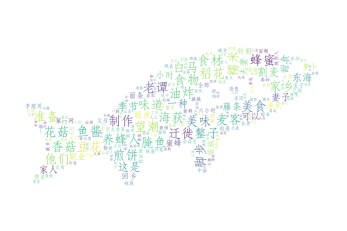

In [17]:
import jieba.analyse
from os import path
import imageio
from ipykernel import kernelapp as app
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#分词，抽取词频排在前200位的词
content = open("./Exp05_fenciExample.txt","rb").read()
tags = jieba.analyse.extract_tags(content, topK=200, withWeight=False)
text =" ".join(tags)
#读入实现准备好的FishPic鱼图片文件作为词云图底图
maskImg = imageio.imread('./FishPic.jpg')
#构造WordCloud对象，参数含义附后
wc = WordCloud(font_path='C:/Windows/Fonts/STFANGSO.ttf',
            background_color='white', max_words=200, mask=maskImg,
            max_font_size=120,min_font_size=10,
            random_state=42,width=1200,height=900)
#生成词云图
wc.generate(text)
image_colors = ImageColorGenerator(maskImg)
#在窗口绘制，并输出文件。
#窗口绘制的为缩略图，画质较差，请用看图软件打开WordCloud.jpg
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('WordCloud.jpg')

原始数据 1
                          标题      日期
0      十大博客看后市：2600点下方将现低吸机会  12月07日
1              杨德龙：跨年度行情能否出现  12月07日
2         午后名博看市：2600点得失至关重要  12月07日
3  李大霄：2449点成为A股历史第五个底部正变为事实  12月07日
4  杨德龙：2019年可能会出现“美股向下、A股向上”  12月07日

情绪得分
                          标题      日期        情绪
0      十大博客看后市：2600点下方将现低吸机会  12月07日  0.108485
1              杨德龙：跨年度行情能否出现  12月07日  0.901201
2         午后名博看市：2600点得失至关重要  12月07日  0.523612
3  李大霄：2449点成为A股历史第五个底部正变为事实  12月07日  0.308116
4  杨德龙：2019年可能会出现“美股向下、A股向上”  12月07日  0.667355

每日评论平均情绪得分：
              情绪  计数      情绪平均
日期                            
09月03日  0.397172   2  0.992931
09月04日  7.164106  11  3.256412
09月05日  5.696181   8  3.560113
09月06日  4.476095   7  3.197211
09月07日  4.904907   8  3.065567

上证指数：
         date     open     high    close      low      volume  price_change  \
0  2018-12-07  2609.34  2614.58  2605.89  2599.28  1090749.88          0.71   
1  2018-12-06  2629.82  2633.68  2605.18  2603.13  1416616.50        -44.63   
2  2018-1

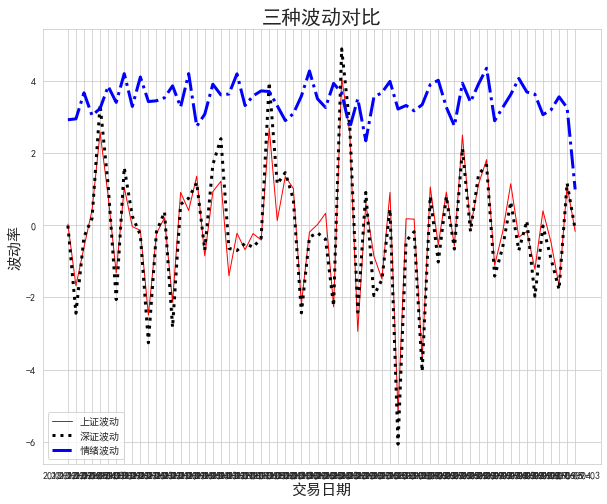

In [18]:
import pandas as pd #加载pandas
from snownlp import SnowNLP
import matplotlib.pyplot as plt
#处理中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

import seaborn as sns
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})

#读取文本数据,读取每行的评论标题
#该数据是从新浪财经频道获取的股票评论标题信息
#时间跨度为2018/9/3-2018/12/7
#共计1000条股评
orig_comments=pd.read_csv('stocktextming.csv')
orig_comments.drop("日期时间",axis=1,inplace=True)
print('原始数据',1)
print(orig_comments.head())
print()

#使用SnowNLP计算对每条标题的文字评估情绪得分
orig_comments['情绪']=None
lenOrig=len(orig_comments)
i=0
while(i<lenOrig):
    s=SnowNLP(orig_comments.iloc[i,0]).sentiments
    orig_comments.iloc[i,2]=s
    i=i+1
#每行的情绪得分  
print('情绪得分')
print(orig_comments.head())
print()

#计算每日的评论平均分
#等于当日评论总等分/当日评论条数
numberByDay=orig_comments['情绪'].groupby(orig_comments['日期']).count()
emotionByDay=orig_comments['情绪'].groupby(orig_comments['日期']).sum()
markByDay=pd.DataFrame()
markByDay['情绪']=emotionByDay
markByDay['计数']=numberByDay
#乘以5放大波动变化，便于观察
markByDay['情绪平均']=markByDay['情绪']/markByDay['计数']*5
print('每日评论平均情绪得分：')
print(markByDay.head())
print()
#将索引转换为日期，并且规格化为后面的shMarket上证指数DataFrame中的日期形式，
#用于数据对比
markByDay['order']=markByDay.index
markByDay['日期']=None

lenMBD=len(markByDay)
i=0
while(i<lenMBD):
    str1=markByDay.iloc[i,3]
    str2='2018-'+str1[0:2] +'-'+str1[3:5]
    markByDay.iloc[i,4]=str2
    i=i+1


#读取当日大盘涨跌幅
shMarket = pd.read_csv('sh.csv',encoding = 'utf-8')
print('上证指数：')
print(shMarket.head())
szMarket = pd.read_csv('sz.csv',encoding = 'utf-8')
print('深证指数：')
print(szMarket.head())
print()
Market=pd.DataFrame()
Market['日期']=shMarket['date']

#按日期取每日股价变动百分比price_change
Market['上证波动']=shMarket['p_change']
Market['深证波动']=szMarket['p_change']
print('New')
print(Market.head())

markByDay.set_index('日期',inplace=True)
Market.set_index('日期',inplace=True)
result = Market.join(markByDay)

print('股市波动与评论情绪变化对比:')
plt.figure(figsize=(10,8))

plt.plot(result['上证波动'],'r-',label='上证波动',linewidth=1)
plt.plot(result['深证波动'],'k:',label='深证波动',linewidth=3)
plt.plot(result['情绪平均'],'b-.',label='情绪波动',linewidth=3)
plt.title('三种波动对比',fontsize=20)
plt.xlabel('交易日期',fontsize=15)
plt.ylabel('波动率',fontsize=15)
plt.legend()
plt.savefig('stockTextMing.png',dpi=300,bbox_inches='tight')
plt.show()